# Jared Waldroff

## Research question/interests

Briefly describe your research question or interests here.

1. Does having a more aggressive play style using demolitions correlate with the amount of wins a team gets.
2. Does having more shots on net correlate with more wins.

# Task 1

AxesSubplot(0.1,0.15;0.8x0.75)
<seaborn.axisgrid.PairGrid object>


,demo_inflicted,core_goals
0,6.0,9.0
1,7.0,5.0
2,11.0,21.0
3,7.0,4.0
4,13.0,12.0
...,...,...
10589,19.0,18.0
10590,22.0,14.0
10591,15.0,5.0
10592,11.0,10.0


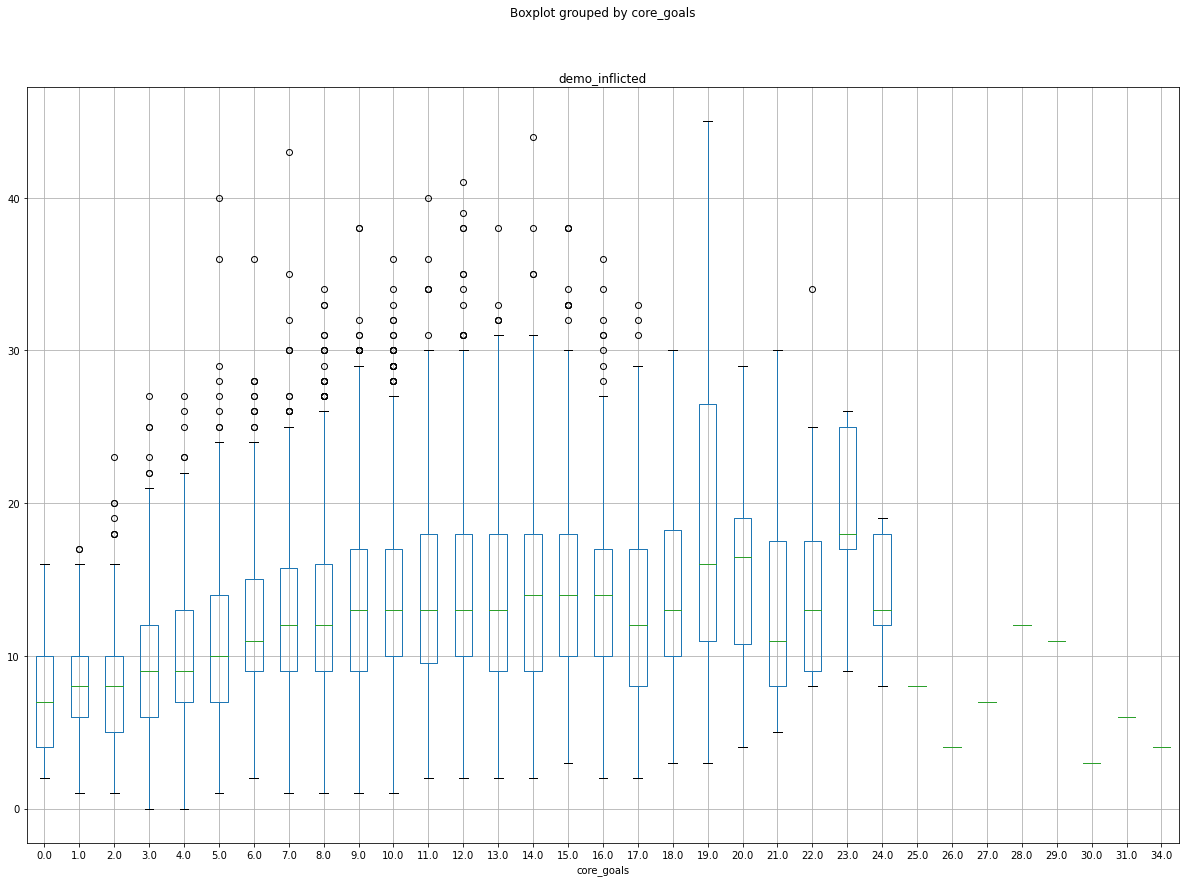

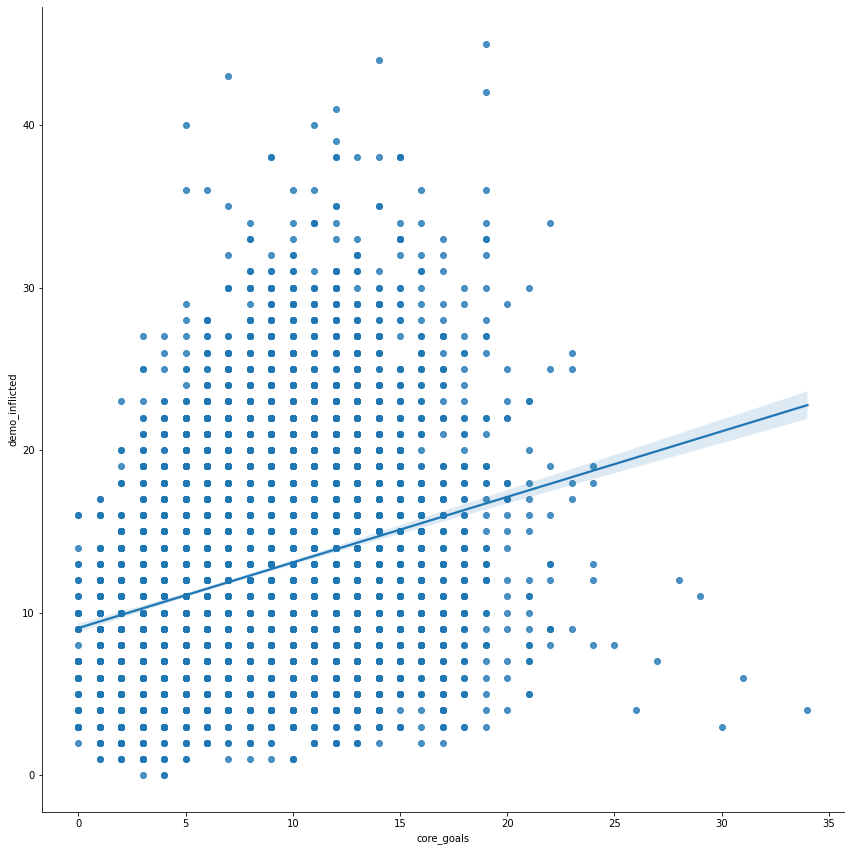

In [ ]:
import pandas as pd
import seaborn as sns

data_set = pd.read_csv('../data/raw/matches_by_teams.csv')

m3_data_set = data_set[['demo_inflicted','core_goals']]

x = m3_data_set.boxplot('demo_inflicted','core_goals', figsize = (20,14))

print(x)

y = sns.pairplot(
    m3_data_set,
    x_vars = ['core_goals'],
    y_vars = ['demo_inflicted'],
    height = 12,
    aspect = 1,
    kind = 'reg'
)

print(y)



m3_data_set


array([[<AxesSubplot:title={'center':'demo_inflicted'}>,
        <AxesSubplot:title={'center':'core_goals'}>]], dtype=object)

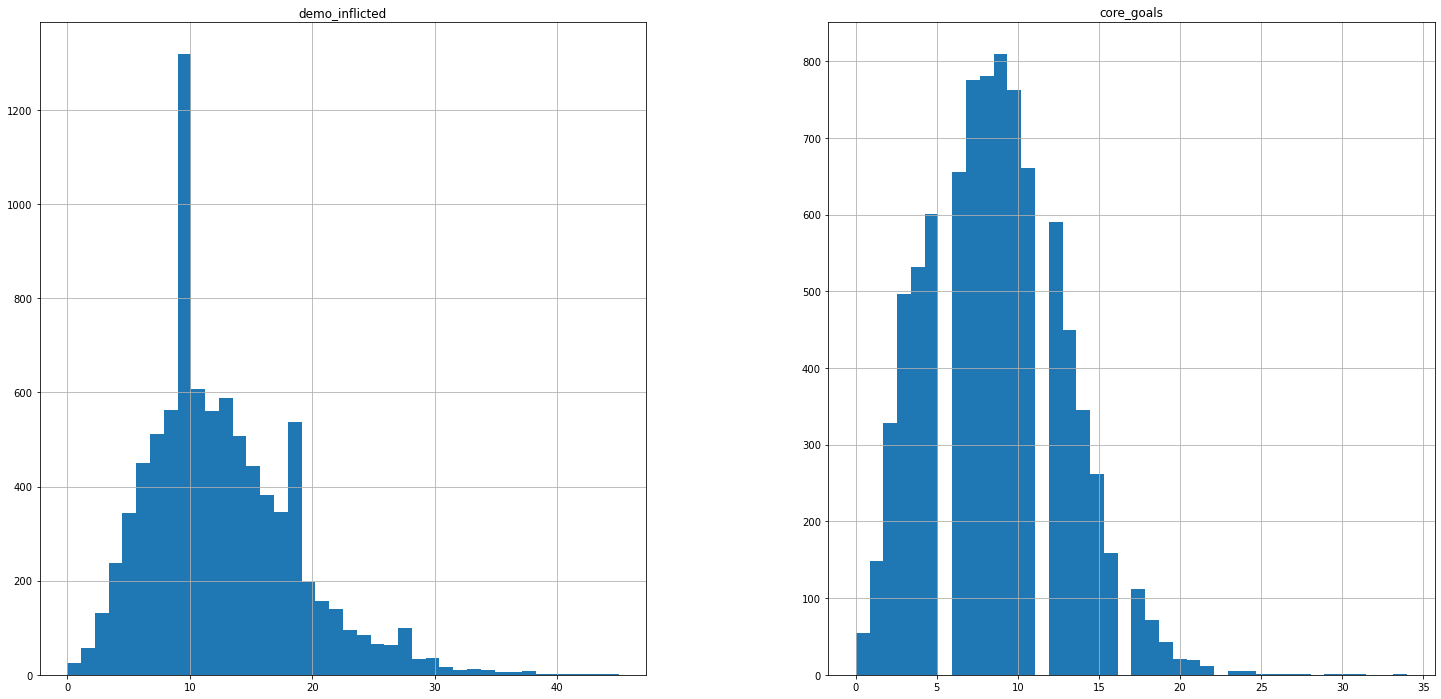

In [ ]:
m3_data_set.hist(bins=40,figsize =(25,12))

In [ ]:
"""
Here I'm looking at goals scored vs. demolitions done against the oposing team. I wanted to know if being more aggressive in the game would result in scoring more goals.
Based on the three charts it is shown that teams who score 9 goals are the most aggressive. Once teams start getting better and scoring more goals they seem to commit not as many demolitions.
This could be because the players get better and they are harder to hit or this could because players who focus on scoring more goals don't end up focusing as much on demolitions.
This is mainly shown in the third diagram. The first two diagrams seem to show a tapering off around 9 goals scored.
"""

# Task 2

In [ ]:
import pandas as pd

m3_data_set = pd.read_csv('../data/raw/matches_by_teams.csv')

clean_data = m3_data_set.drop(columns=['match_id',
            'team_id',
            'team_slug',
            'color',
            'positioning_time_neutral_third',
            'positioning_time_offensive_third',
            'positioning_time_defensive_half',
            'positioning_time_offensive_half',
            'movement_time_powerslide',
            'positioning_time_defensive_third',
            'positioning_time_behind_ball',
            'positioning_time_in_front_ball',
            'movement_time_slow_speed',
            'movement_time_ground',
            'movement_time_low_air',
            'boost_time_boost_75_100',
            'core_score',
            'core_shooting_percentage',
            'movement_time_boost_speed',
            'boost_amount_stolen_big',
            'boost_amount_stolen_small',
            'boost_amount_collected_small',
            'boost_amount_stolen',
            'boost_bpm',
            'boost_bcpm',
            'boost_avg_amount',
            'boost_amount_collected',
            'boost_count_collected_big',
            'boost_count_collected_small',
            'boost_count_stolen_small',
            'boost_count_stolen_big',
            'boost_amount_collected_big',
            'boost_amount_overfill',
            'boost_amount_overfill_stolen',
            'boost_amount_used_while_supersonic',
            'boost_time_boost_0_25',
            'boost_time_boost_25_50',
            'boost_time_boost_50_75',
            'boost_time_zero_boost'
])

clean_data_remove_columns = clean_data.dropna()

clean_data_change_names = clean_data_remove_columns.rename(columns={
    'team_name':'Team Name',
    'team_region':'Team Region',
    'core_shots':'Shots',
    'core_goals':'Goals',
    'core_saves':'Saves',
    'core_assists':'Assists',
    'boost_time_full_boost':'Time at Full Boost',
    'movement_total_distance':'Total Distance Moved',
    'movement_time_supersonic_speed':'Time at Supersonic Speed',
    'movement_time_high_air':'Time in High Air',
    'movement_count_powerslide':'Powerslide Distance',
    'demo_inflicted':'Demos Inflicted',
    'demo_taken':'Demos Taken',
    'score':'Score',
    'winner':'Winner'
})

clean_data_change_names



,Team Name,Team Region,Shots,Goals,Saves,Assists,Time at Full Boost,Total Distance Moved,Time at Supersonic Speed,Time in High Air,Powerslide Distance,Demos Inflicted,Demos Taken,Score,Winner
0,GROUND ZERO GAMING,Oceania,34.0,9.0,8.0,7.0,370.91,4694698.0,578.77,210.83,840.0,6.0,7.0,3.0,True
1,RANGA ROUNDUP,Oceania,15.0,5.0,21.0,3.0,313.00,4774768.0,614.48,175.53,702.0,7.0,6.0,0.0,False
2,RENEGADES,Oceania,46.0,21.0,10.0,21.0,311.35,5098012.0,600.10,238.28,767.0,11.0,7.0,3.0,True
3,TRIDENT ESPORTS,Oceania,16.0,4.0,16.0,3.0,278.31,4893312.0,542.23,174.47,551.0,7.0,11.0,0.0,False
4,DIRE WOLVES,Oceania,46.0,12.0,13.0,9.0,796.05,6680885.0,644.94,290.85,1020.0,13.0,8.0,3.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10589,TEAM BDS,Europe,61.0,18.0,29.0,14.0,688.01,10010525.0,1011.67,523.30,1017.0,19.0,13.0,4.0,True
10590,G2 ESPORTS,North America,46.0,14.0,38.0,12.0,554.70,9022216.0,1023.51,485.48,1594.0,22.0,15.0,4.0,True
10591,FAZE CLAN,North America,50.0,5.0,26.0,4.0,620.84,8961362.0,963.24,459.89,1440.0,15.0,22.0,2.0,False
10592,TEAM BDS,Europe,36.0,10.0,19.0,8.0,488.50,7387374.0,731.29,355.54,793.0,11.0,21.0,4.0,True


# Task 3 - Step 1

In [ ]:
import pandas as pd
import numpy as np

df = (
    pd.DataFrame(data = pd.read_csv('../data/raw/matches_by_teams.csv'))
    .drop(columns = [
        'match_id',
        'team_id',
        'team_slug',
        'color',
        'positioning_time_neutral_third',
        'positioning_time_offensive_third',
        'positioning_time_defensive_half',
        'positioning_time_offensive_half',
        'movement_time_powerslide',
        'positioning_time_defensive_third',
        'positioning_time_behind_ball',
        'positioning_time_in_front_ball',
        'movement_time_slow_speed',
        'movement_time_ground',
        'movement_time_low_air',
        'boost_time_boost_75_100',
        'core_score',
        'core_shooting_percentage',
        'movement_time_boost_speed',
        'boost_amount_stolen_big',
        'boost_amount_stolen_small',
        'boost_amount_collected_small',
        'boost_amount_stolen',
        'boost_bpm',
        'boost_bcpm',
        'boost_avg_amount',
        'boost_amount_collected',
        'boost_count_collected_big',
        'boost_count_collected_small',
        'boost_count_stolen_small',
        'boost_count_stolen_big',
        'boost_amount_collected_big',
        'boost_amount_overfill',
        'boost_amount_overfill_stolen',
        'boost_amount_used_while_supersonic',
        'boost_time_boost_0_25',
        'boost_time_boost_25_50',
        'boost_time_boost_50_75',
        'boost_time_zero_boost'
    ])
    .assign(DemosPerGoal=lambda x: x.demo_inflicted / x.core_goals)
    .rename(columns = {
        'team_name':'Team Name',
        'team_region':'Team Region',
        'core_shots':'Shots',
        'core_goals':'Goals',
        'core_saves':'Saves',
        'core_assists':'Assists',
        'boost_time_full_boost':'Time at Full Boost',
        'movement_total_distance':'Total Distance Moved',
        'movement_time_supersonic_speed':'Time at Supersonic Speed',
        'movement_time_high_air':'Time in High Air',
        'movement_count_powerslide':'Powerslide Distance',
        'demo_inflicted':'Demos Inflicted',
        'demo_taken':'Demos Taken',
        'score':'Score',
        'winner':'Winner',
        'DemosPerGoal':'Demos Per Goal'
    })
    .dropna(how='any',axis=0)
)
            
df

,Team Name,Team Region,Shots,Goals,Saves,Assists,Time at Full Boost,Total Distance Moved,Time at Supersonic Speed,Time in High Air,Powerslide Distance,Demos Inflicted,Demos Taken,Score,Winner,Demos Per Goal
0,GROUND ZERO GAMING,Oceania,34.0,9.0,8.0,7.0,370.91,4694698.0,578.77,210.83,840.0,6.0,7.0,3.0,True,0.666667
1,RANGA ROUNDUP,Oceania,15.0,5.0,21.0,3.0,313.00,4774768.0,614.48,175.53,702.0,7.0,6.0,0.0,False,1.400000
2,RENEGADES,Oceania,46.0,21.0,10.0,21.0,311.35,5098012.0,600.10,238.28,767.0,11.0,7.0,3.0,True,0.523810
3,TRIDENT ESPORTS,Oceania,16.0,4.0,16.0,3.0,278.31,4893312.0,542.23,174.47,551.0,7.0,11.0,0.0,False,1.750000
4,DIRE WOLVES,Oceania,46.0,12.0,13.0,9.0,796.05,6680885.0,644.94,290.85,1020.0,13.0,8.0,3.0,True,1.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10589,TEAM BDS,Europe,61.0,18.0,29.0,14.0,688.01,10010525.0,1011.67,523.30,1017.0,19.0,13.0,4.0,True,1.055556
10590,G2 ESPORTS,North America,46.0,14.0,38.0,12.0,554.70,9022216.0,1023.51,485.48,1594.0,22.0,15.0,4.0,True,1.571429
10591,FAZE CLAN,North America,50.0,5.0,26.0,4.0,620.84,8961362.0,963.24,459.89,1440.0,15.0,22.0,2.0,False,3.000000
10592,TEAM BDS,Europe,36.0,10.0,19.0,8.0,488.50,7387374.0,731.29,355.54,793.0,11.0,21.0,4.0,True,1.100000


# Task 3 - Part 2

In [ ]:
def load_and_process(path):
                     
    # Method Chain 1 (Load data and deal with missing data)
                     
    df1 = (
        pd.read_csv(path)
        .rename(columns = {
            'team_name':'Team Name',
            'team_region':'Team Region',
            'core_shots':'Shots',
            # 'core_goals':'Goals',
            'core_saves':'Saves',
            'core_assists':'Assists',
            'boost_time_full_boost':'Time at Full Boost',
            'movement_total_distance':'Total Distance Moved',
            'movement_time_supersonic_speed':'Time at Supersonic Speed',
            'movement_time_high_air':'Time in High Air',
            'movement_count_powerslide':'Powerslide Distance',
            # 'demo_inflicted':'Demos Inflicted',
            'demo_taken':'Demos Taken',
            'score':'Score',
            'winner':'Winner',
            'DemosPerGoal':'Demos Per Goal'
        })
        .dropna(how='any',axis=0)
          )

    # Method Chain 2 (Create new columns, drop others, and do processing)

    df2 = (
          df1
        .assign(DemosPerGoal=lambda x: x.demo_inflicted / x.core_goals)
        .drop(columns = [
            'match_id',
            'team_id',
            'team_slug',
            'color',
            'positioning_time_neutral_third',
            'positioning_time_offensive_third',
            'positioning_time_defensive_half',
            'positioning_time_offensive_half',
            'movement_time_powerslide',
            'positioning_time_defensive_third',
            'positioning_time_behind_ball',
            'positioning_time_in_front_ball',
            'movement_time_slow_speed',
            'movement_time_ground',
            'movement_time_low_air',
            'boost_time_boost_75_100',
            'core_score',
            'core_shooting_percentage',
            'movement_time_boost_speed',
            'boost_amount_stolen_big',
            'boost_amount_stolen_small',
            'boost_amount_collected_small',
            'boost_amount_stolen',
            'boost_bpm',
            'boost_bcpm',
            'boost_avg_amount',
            'boost_amount_collected',
            'boost_count_collected_big',
            'boost_count_collected_small',
            'boost_count_stolen_small',
            'boost_count_stolen_big',
            'boost_amount_collected_big',
            'boost_amount_overfill',
            'boost_amount_overfill_stolen',
            'boost_amount_used_while_supersonic',
            'boost_time_boost_0_25',
            'boost_time_boost_25_50',
            'boost_time_boost_50_75',
            'boost_time_zero_boost'])
        .rename(columns = {
            'core_goals':'Goals',
            'demo_inflicted':'Demos Inflicted',
            'DemosPerGoal':'Demos Per Goal'})
      )

    # Rreturn the latest dataframe

    return df2 

In [ ]:
load_and_process('../data/raw/matches_by_teams.csv')


,Team Name,Team Region,Shots,Goals,Saves,Assists,Time at Full Boost,Total Distance Moved,Time at Supersonic Speed,Time in High Air,Powerslide Distance,Demos Inflicted,Demos Taken,Score,Winner,Demos Per Goal
0,GROUND ZERO GAMING,Oceania,34.0,9.0,8.0,7.0,370.91,4694698.0,578.77,210.83,840.0,6.0,7.0,3.0,True,0.666667
1,RANGA ROUNDUP,Oceania,15.0,5.0,21.0,3.0,313.00,4774768.0,614.48,175.53,702.0,7.0,6.0,0.0,False,1.400000
2,RENEGADES,Oceania,46.0,21.0,10.0,21.0,311.35,5098012.0,600.10,238.28,767.0,11.0,7.0,3.0,True,0.523810
3,TRIDENT ESPORTS,Oceania,16.0,4.0,16.0,3.0,278.31,4893312.0,542.23,174.47,551.0,7.0,11.0,0.0,False,1.750000
4,DIRE WOLVES,Oceania,46.0,12.0,13.0,9.0,796.05,6680885.0,644.94,290.85,1020.0,13.0,8.0,3.0,True,1.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10589,TEAM BDS,Europe,61.0,18.0,29.0,14.0,688.01,10010525.0,1011.67,523.30,1017.0,19.0,13.0,4.0,True,1.055556
10590,G2 ESPORTS,North America,46.0,14.0,38.0,12.0,554.70,9022216.0,1023.51,485.48,1594.0,22.0,15.0,4.0,True,1.571429
10591,FAZE CLAN,North America,50.0,5.0,26.0,4.0,620.84,8961362.0,963.24,459.89,1440.0,15.0,22.0,2.0,False,3.000000
10592,TEAM BDS,Europe,36.0,10.0,19.0,8.0,488.50,7387374.0,731.29,355.54,793.0,11.0,21.0,4.0,True,1.100000


# Task 3 - Part 3